## KDE分布图

KDE（Kernel Density Estimation，核密度估计）可以理解为是直方图的加窗平滑。通过绘制KDE分布图，可以查看并对比训练集和测试集中特征变量的分布情况，发现两个数据集中分布不一致的特征变量。

分布不一致，会导致模型的泛化能力变差，需要删除此类特征。

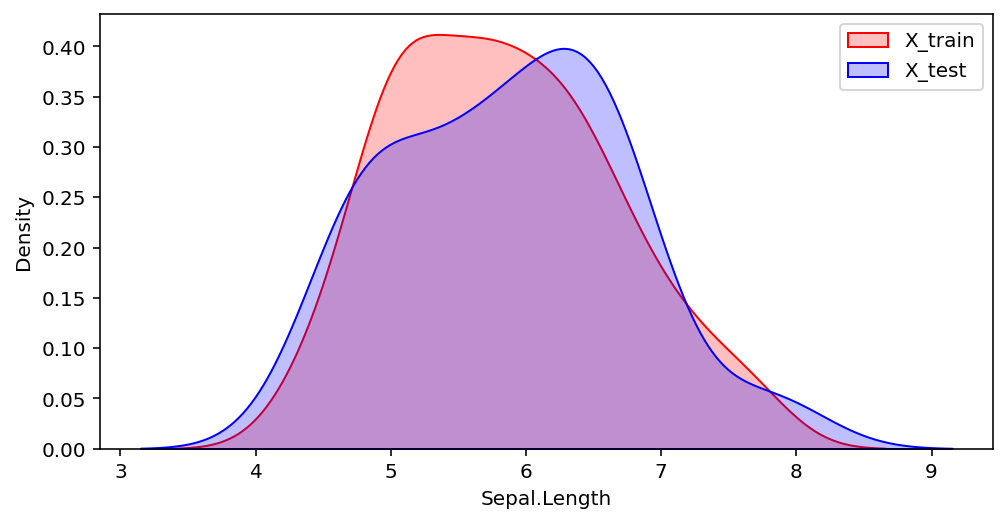

In [36]:
# 让可视化更方便更美观
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
from sklearn.model_selection import train_test_split

iris = data('iris')
X = iris.drop('Species', axis=1)
y = iris.Species
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.figure(figsize=(8, 4))
ax = sns.kdeplot(data=X_train['Sepal.Length'], color='r', shade=True)
ax = sns.kdeplot(data=X_test['Sepal.Length'], color='b', shade=True)
ax = ax.legend(['X_train', 'X_test'])
# 可以看出训练集和测试集的分布大概相同

## seaborn.kdeplot

seaborn.kdeplot(x=None, *, y=None, shade=None, vertical=False, kernel=None, bw=None, gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=None, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, weights=None, hue=None, palette=None, hue_order=None, hue_norm=None, multiple='layer', common_norm=True, common_grid=False, levels=10, thresh=0.05, bw_method='scott', bw_adjust=1, log_scale=None, color=None, fill=None, data=None, data2=None, **kwargs)

- x: df中的列名或者直接传入series
- y: df中的列名或者直接传入series
- hue: df中的列名, 按照列名中的值分类形成分类的箱线图
- data：一维数组，单变量时作为唯一的变量
- data2：格式同data2，单变量时不输入，双变量作为第2个输入变量
- shade：bool型变量，用于控制是否对核密度估计曲线下的面积进行色彩填充，True代表填充
- color：字符型变量，用于控制核密度曲线色彩，同plt.plot()中的color参数，如'r'代表红色
- vertical：bool型变量，在单变量输入时有效，用于控制是否颠倒x-y轴位置
- kernel：字符型输入，用于控制核密度估计的方法，默认为'gau'，即高斯核，特别地在2维变量的情况下仅支持高斯核方法
- legend：bool型变量，用于控制是否在图像上添加图例
- cumulative：bool型变量，用于控制是否绘制核密度估计的累计分布，默认为False
- shade_lowest：bool型变量，用于控制是否为核密度估计中最低的范围着色，主要用于在同一个坐标轴中比较多个不同分布总体，默认为True
- cbar：bool型变量，用于控制是否在绘制二维核密度估计图时在图像右侧边添加比色卡
- cmap：字符型变量，用于控制核密度区域的递进色彩方案，同plt.plot()中的cmap参数，如'Blues'代表蓝色系
- n_levels：int型，在而为变量时有效，用于控制核密度估计的区间个数，反映在图像上的闭环层数

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

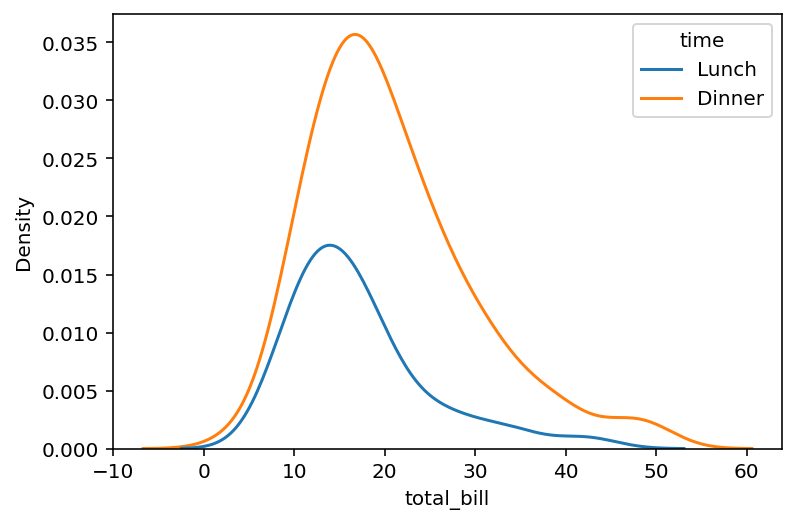

In [42]:
import seaborn as sns

tips = sns.load_dataset('tips')
sns.kdeplot(x='total_bill', data=tips, hue='time')

<AxesSubplot:ylabel='Density'>

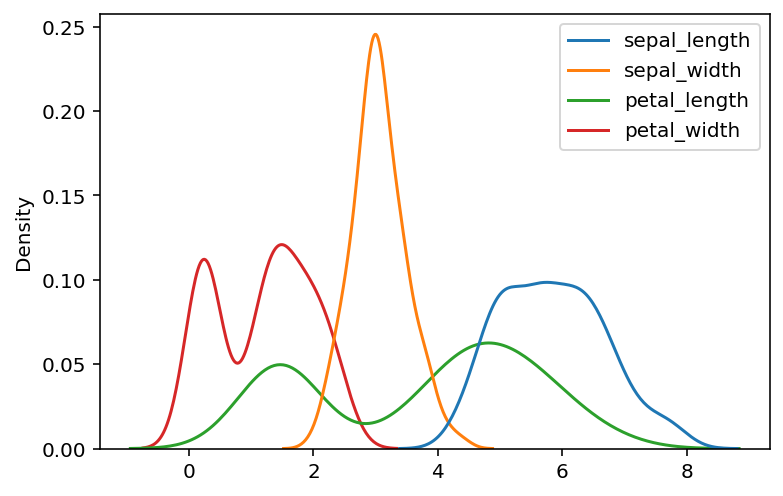

In [44]:
# 也可以同时画多个列
import seaborn as sns

iris = sns.load_dataset('iris')
sns.kdeplot(data=iris)